In [1]:
import numpy as np
import os

In [2]:
from firefly.data_reader import ArrayReader

palettable colormaps are not installed
don't have phil's colormaps


In [3]:
from firefly.data_reader import FIREreader,SimpleFIREreader,TweenParams
from abg_python.galaxy.gal_utils import Galaxy

In [4]:
from abg_python.fitting_utils import fitAXb

In [5]:
from abg_python.plot_utils import plt,nameAxes,bufferAxesLabels,latex_columnwidth,clean_savefig,latex_pagewidth
%matplotlib inline

In [6]:
import os

In [7]:
from abg_python.color_utils import get_distinct

In [8]:
import sys

In [9]:
sys.path.insert(0, '/Users/ageller/VISUALIZATIONS/Firefly')
sys.path.insert(0,'/Users/agurvich/research/repos/firefly/src')

In [10]:
galaxy = Galaxy('m12b_res57000',600)
galaxy.extractMainHalo(use_saved_subsnapshots=False)

Couldn't find a metadata file... for
 Metadata object at /Users/agurvich/scratch/data/metal_diffusion/m12b_res57000/metadata/meta_Galaxy_600.hdf5
Tracing the rockstar halo files with fancy:True and None Gyr smoothing.
No rstar 1/2 in halo or metadata files, we will need to calculate it ourselves.
Loading star particles of m12b_res57000 at 600 at /Users/agurvich/snaps/metal_diffusion/m12b_res57000/output
Failed to open saved sub-snapshots AssertionError('Told not to use saved sub-snapshots')
Loading gas particles of m12b_res57000 at 600 at /Users/agurvich/snaps/metal_diffusion/m12b_res57000/output
Loading dark matter particles of m12b_res57000 at 600 at /Users/agurvich/snaps/metal_diffusion/m12b_res57000/output
Reorienting...
Done.
extract_halo_inner(m12b_res57000 at 600,){'orient_stars': True, 'use_saved_subsnapshots': False} 10.40 s elapsed
Snapshot memory free


(12.27201256901771,
 True,
 13.610546783496492,
 -23.753615253930974,
 331.60968,
 2.454402513803542,
 140.56429531755958)

In [11]:
thetas = np.arange(0,360,1)
xs = np.sin(thetas/180*np.pi)*(-1e4)
zs = np.cos(thetas/180*np.pi)*(-1e4)
coords = np.zeros((thetas.size,3))
coords[:,0] = xs
coords[:,-1] = zs

my_tween = TweenParams(coords,duration=10)

In [313]:
## create a FIRE reader object
reader = FIREreader(
    ## path to directory containing (optionally multiple) .hdf5 files
    snapdir = "/Users/agurvich/research/snaps/metal_diffusion/m12b_res57000/output/",
    ## the snapshot number, best to provide separately in order to disambiguate
    snapnum = 600,
    ## particle types one would like to extract from .hdf5 files
    ptypes=[0,4,1,2],
    ## what to call them in the UI
    UInames=['Gas','Stars','HRDM','LRDM'],
    ## by what factor would we like to reduce the data for performance stability and disk space concerns
    decimation_factors=[10,1000,1000,1000],
    ## what fields would we like to extract
    fields=['Density','Temperature','AgeGyr','GCRadius'],
    ## do we want to take the magnitude of any of these fields?
    ## do we want to take the log? 
    logFlags=[True,True,False,False],
    ## which fields do we want to be able to filter on?
    filterFlags=[True,True,True,True],
    ## which fields do we want to be able to colormap by?
    colormapFlags=[True,True,True,True],
    radiusFlags=[False,True,True,False],
    ## where should the output .json files be saved to? 
    ##  if a relative path is given, like here, saves to $HOME/<JSONdir>
    ##  and creates a soft-link to firefly/static/data
    JSONdir=os.path.abspath(os.path.join(os.getcwd(),'..','static','data','FIRESampleData')),
    ## overwrite the existing startup.json file
    write_startup=True,
    clean_JSONdir=True,
    tweenParams=my_tween)

## fetch data from .hdf5 files
reader.loadData(
    com=galaxy.scom,
    vcom=galaxy.sub_snap['vscom'])

Loading ptype 2
Loading ptype 1
Loading ptype 4
Loading ptype 0


array([Gas - 622573/6225729 particles - 4 tracked fields,
       Stars - 3265/3264723 particles - 3 tracked fields,
       HRDM - 9324/9323040 particles - 2 tracked fields,
       LRDM - 3043/3042265 particles - 2 tracked fields], dtype=object)

In [417]:
denom

21855757

In [416]:
num = 0
denom = 0
for pg in reader.particleGroups:
    nf = len(pg.field_names)
    npart = pg.field_arrays.shape[1]
    num+=nf*npart
    denom +=npart
print(num/denom)

2.719086554631807


In [314]:
del galaxy.sub_snap
del galaxy.sub_star_snap
del galaxy.sub_dark_snap

In [16]:
reader.settings['start_tween'] = True

In [182]:
reader.settings['camera'] = [0,0,-1e4]
i=4

In [183]:
dec_factorss = []
dec_factorss += [[1e5,1e6,1e6,1e6]]
dec_factorss += [[1e4,1e6,1e6,1e6]]
dec_factorss += [[1e3,1e6,1e6,1e6]]
dec_factorss += [[1e2,1e6,1e6,1e6]]
dec_factorss += [[1e1,1e6,1e6,1e6]]
dec_factorss += [[1e0,1e6,1e6,1e6]]
dec_factorss += [[1e0,1e0,1e6,1e6]]
dec_factorss += [[1e0,1e0,2e0,1e6]]
dec_factorss += [[1e0,1e0,1e0,1e6]]
dec_factorss += [[1e0,1e0,1e0,1e0]]

reader.max_npart_per_file = int(1e5)
for dec_factors in dec_factorss[i:i+1]:
    ntot = 0
    for dec_factor,pg in zip(dec_factors,reader.particleGroups):
        pg.decimation_factor = int(dec_factor)
        pg.getDecimationIndexArray()
        ntot+=pg.dec_inds.size
    print(ntot,end='\t')
    reader.writeToDisk(extension='.json',loud=False)
    ! du -sh ../static/data/FIRESampleData
    i+=1

622587	105M	../static/data/FIRESampleData


## 1e4

.ffly

In [ ]:
77,0.05299997329711914,0.014016678
637,0.05800008773803711,0.01919867
6240,0.09299993515014648,0.026290222
62272,0.20199990272521973,0.055233111
622587,1.3269999027252197,0.206017463
6225744,32.65700006484985,1.148272378
9490464,65.6399998664856,1.740631162
-----
14151975,91.73600006103516,2.506630892

.json

In [ ]:
77,0.06599998474121094,0.016284321
637,0.053999900817871094,0.017685976
6240,0.0989999771118164,0.027150332
62272,0.23599982261657715,0.054232584
622587,1.7220001220703125,0.195355635
6225744,49.615999937057495,1.277025522
9490464,67.38100004196167,1.743014507
-----

## 1e6

.json

In [ ]:
77,0.059999942779541016,0.016284254
637,0.05200004577636719,0.017440312
6240,0.09399986267089844,0.026887898
62272,0.2330000400543213,0.061356648
622587,1.5950000286102295,0.511305219
6225744,15.92199993133545,1.29839879
9490464,20.624000072479248,2.04925402
14151975,30.027999877929688,2.751117971
-------
18813495,41.27199983596802,3.256287061
21855757,53.05400013923645,3.922269715

.ffly

In [180]:
77,0.07500004768371582,0.017326194
637,0.06000018119812012,0.018936524
6240,0.09299993515014648,0.026552302
62272,0.19500017166137695,0.055363863
622587,1.246999979019165,0.473493371
6225744,11.869999885559082,1.443125399
9490464,14.700999975204468,1.975328908
14151975,19.59500002861023,2.662463146
18813495,31.33899998664856,3.411601695
21855757,52.90499997138977,3.931520994

(14151975, 19.59500002861023, 2.662463146)

## 1e5

In [249]:
ffly_vals = np.array([line.split(',') for line in """77,0.05900001525878906,0.017064056
637,0.08000016212463379,0.018136829
6240,0.10400009155273438,0.023128302
62272,0.21600008010864258,0.062277596
622587,1.2309999465942383,0.220690863
6225744,14.410000085830688,1.212123229
9490464,17.954999923706055,1.701010122
14151975,22.130000114440918,2.442347864
18813495,40.09999990463257,3.232732077""".split('\n')],dtype=float)



ffly_disk_sizes = np.array([line.split(',') for line in """77,24000
637,48000
6240,264000
62272,2400000
622587,24000000
6225744,238000000
9490464,350000000
14151975,492000000
18813495,635000000""".split('\n')],dtype=int)


json_vals = np.array([line.split(',') for line in """77,0.0559999942779541,0.021532112
637,0.046000003814697266,0.023241817
6240,0.08500003814697266,0.032178145
62272,0.23200011253356934,0.064776421
622587,1.6700000762939453,0.409123759
6225744,18.068000078201294,1.2720236
9490464,21.130000114440918,1.761668701
14151975,28.098999977111816,2.44843447
18813495,56.579999923706055,3.249422113""".split('\n')],dtype=float)



json_disk_sizes = np.array([line.split(',') for line in """77,32000
637,104000
6240,848000
62272,8100000
622587,81000000
6225744,807000000
9490464,1100000000
14151975,1600000000
18813495,2100000000""".split('\n')],dtype=int)

In [250]:
colors = get_distinct(2)

In [251]:
plt.rcParams['font.size']=12

In [252]:
slope = None

0.0001750270753878325 17.46011625919514
saving: /Users/agurvich Desktop/performance.pdf


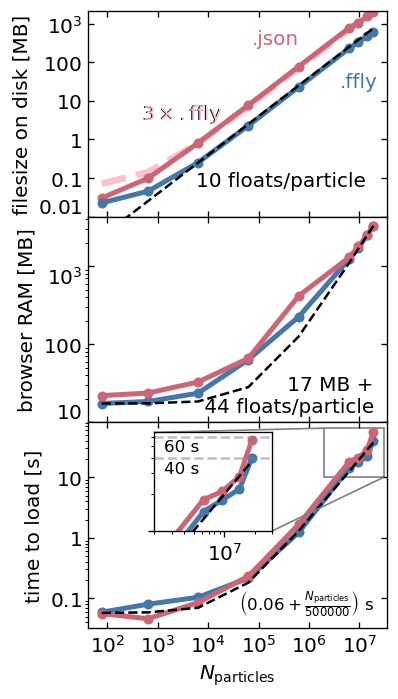

In [406]:
fig,axs = plt.subplots(nrows=3,ncols=1,sharex=True)
fig.subplots_adjust(wspace=0,hspace=0)
fig.set_size_inches(latex_columnwidth,2*latex_columnwidth)
fig.set_dpi(120)
fig.set_facecolor('white')




ax = axs[0]

ax.plot(ffly_disk_sizes[:,0],ffly_disk_sizes[:,1]/1024**2*3.125,label='$3\times$.ffly',lw=4,c='pink',alpha=1,ls='--')
ax.plot(json_disk_sizes[:,0],json_disk_sizes[:,1]/1024**2,label='.json',lw=3,c=colors[1],marker='.',markeredgewidth=3)
ax.plot(ffly_disk_sizes[:,0],ffly_disk_sizes[:,1]/1024**2,label='.ffly',lw=3,c=colors[0],marker='.',markeredgewidth=3)

xs,ys = ffly_disk_sizes[:,0],ffly_disk_sizes[:,1]/1024**2
#a,b = fitAXb(xs,ys,None,fixed_b=0)

ax.plot(xs,40e-6*xs,ls='--',c='k')
#ax.text(xs[2]*0.98*0.9,ys[2]*0.999*0.6,r'10 floats/particle',va='top',ha='left',c='k')
ax.text(xs[2]*0.9,ys[2]*0.6,r'10 floats/particle',va='top',ha='left')
#ax.text(xs[2]*1.5,ys[2]*0.2,'$=3$ coords +\n    3 vels +\n    4 scalars',va='top',ha='left',fontsize=10)

    
ax.text(ffly_disk_sizes[-3,0],ffly_disk_sizes[-3,1]/1024**2/6,'.ffly',va='top',ha='center',c=colors[0])
ax.text(json_disk_sizes[-5,0],json_disk_sizes[-5,1]/1024**2*3,'.json',va='bottom',ha='right',c=colors[1])


ax.text(ffly_disk_sizes[2,0]*3*0.99,ffly_disk_sizes[2,1]/1024**2*3.125*3*0.99,r'$3\times\mathrm{.ffly}$',va='bottom',ha='right',c='k')
ax.text(ffly_disk_sizes[2,0]*3,ffly_disk_sizes[2,1]/1024**2*3.125*3,r'$3\times\mathrm{.ffly}$',va='bottom',ha='right',c='pink')
nameAxes(
    ax,
    None,
    '$N_\mathrm{particles}$',
    'filesize on disk [MB]',
    logflag=(1,1),
    ylow=0.01)
fig.set_facecolor('white')
fig.set_size_inches(latex_columnwidth,latex_columnwidth*3)
ax.set_xticks(10**np.array([2,3,4,5,6,7]))
ax.set_xticklabels(["$10^{%d}$"%power for power in [2,3,4,5,6,7]])
ax.set_yticks([0.01,0.1,1,10,100,1000])
ax.tick_params(top=True,labeltop=False)
ax.tick_params(right=True,labelright=False,direction='in')









ax = axs[1]
ax.plot(ffly_vals[:,0],ffly_vals[:,2]*1024,lw=3,c=colors[0],marker='.',markeredgewidth=3)
ax.plot(json_vals[:,0],json_vals[:,2]*1024,lw=3,c=colors[1],marker='.',markeredgewidth=3)
#ax.text(ffly_vals[0,0],ffly_vals[0,2]*1024,'.ffly',va='top')
#ax.text(json_vals[0,0],json_vals[0,2]*1024+3,'.json',va='bottom',ha='left')

xs = ffly_vals[:,0]
ys = ffly_vals[:,2]*1024
if slope is None: slope = 1
offset = ys[0]-slope*xs[0]
slope = (ys[-1]-offset)/(xs[-1]-xs[0])
offset = ys[0]-slope*xs[0]
print(slope,offset)
ax.plot(xs,slope*xs+offset,ls='--',c='k')
ax.text(xs[2],slope*xs[2]+offset/1.6,
f'              {offset:.0f} MB +\n {slope*1e6/4:.0f} floats/particle',va='bottom',ha='left')

nameAxes(ax,None,'$N_\mathrm{particles}$','browser RAM [MB]',
         logflag=(1,1))
ax.set_yticks([10,100,1000])
ax.set_xticks(10**np.array([2,3,4,5,6,7]))
ax.set_xticklabels(["$10^{%d}$"%power for power in [2,3,4,5,6,7]])
ax.tick_params(top=True,labeltop=False)
ax.tick_params(right=True,labelright=False,direction='in')







ax = axs[2]


from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes,mark_inset

axins = zoomed_inset_axes(ax, zoom=2,bbox_to_anchor=(0.15,0.5,0.5,.5),bbox_transform=ax.transAxes)
axins.plot(ffly_vals[:,0],ffly_vals[:,1],lw=3,c=colors[0],marker='.',markeredgewidth=3)
axins.plot(json_vals[:,0],json_vals[:,1],lw=3,c=colors[1],marker='.',markeredgewidth=3)

axins.set_xlim(2e6,3e7)
axins.set_ylim(10,65)
axins.tick_params(labelleft=False,labelbottom=True)
nameAxes(axins,None,None,None,logflag=(1,1))
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

xs,ys = ffly_vals[:,0],ffly_vals[:,1]


ax.plot(ffly_vals[:,0],ffly_vals[:,1],lw=3,c=colors[0],marker='.',markeredgewidth=3)
ax.plot(json_vals[:,0],json_vals[:,1],lw=3,c=colors[1],marker='.',markeredgewidth=3)
a,b = fitAXb(xs,ys,None)

a = 1/np.round(1/a,-5)
axins.plot(xs,a*xs+b,ls='--',c='k')
ax.plot(xs,a*xs+b,ls='--',c='k')
ax.text(xs[3]*0.65,(a*xs[3]+b)*0.8,
r'$\left('+
f'{b:.2f} +'+
r'\frac{N_\mathrm{particles}}{'+
f'{np.round(1/a,-1):0.0f}'+
r'}'+
r'\right)$ s',
va='top',ha='left',fontsize=10)


ax.set_yticks([0,20,40,60])
nameAxes(ax,None,'$N_\mathrm{particles}$','time to load [s]',logflag=(1,1))
ax.tick_params(top=True,labeltop=False)
ax.tick_params(right=True,labelright=False,direction='in')
axins.axhline(60,ls='--',alpha=0.5,c='gray')
axins.text(2.5e6,57,'60 s',va='top',fontsize=10)
axins.axhline(40,ls='--',alpha=0.5,c='gray')
axins.text(2.5e6,38,'40 s',va='top',fontsize=10)
ax.set_xticks(10**np.array([2,3,4,5,6,7]))
ax.set_xticklabels(["$10^{%d}$"%power for power in [2,3,4,5,6,7]])
fig





bufferAxesLabels(axs,3,1)
clean_savefig(fig,'Desktop/performance.pdf',latex_columnwidth,latex_columnwidth*1.75,plotdir=os.environ['HOME'])

In [315]:
this_pg = reader.particleGroups[0]


In [316]:
import time

In [317]:
dec_factors = [1e4,1e3,1e2,10,3,2,1]
maxes = [1e5,1e4,1e3]

durations = np.zeros((len(dec_factors),len(maxes)))
nnodess = np.zeros((len(dec_factors),len(maxes)))
npointss = np.zeros(len(dec_factors))

for i,dec_factor in enumerate(dec_factors):
    this_pg.decimation_factor = int(dec_factor)
    this_pg.getDecimationIndexArray()
    for j,this_max in enumerate(maxes):
        init_time = time.time()
        this_pg.createOctree(npart_max_node=this_max)
        duration = time.time()-init_time
        nnodess[i,j] = len(this_pg.octree.node_list)
        durations[i,j] = duration

    npointss[i] = this_pg.octree.nodes[''].npoints
    print(durations)

Bulding octree of 622 points
0.00%	...done!
adding 1 'outliers' to root node's buffer.
Bulding octree of 622 points
0.00%	...done!
adding 1 'outliers' to root node's buffer.
Bulding octree of 622 points
0.00%	...done!
adding 1 'outliers' to root node's buffer.
[[0.06947589 0.06312609 0.06258321]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]]
Bulding octree of 6224 points
0.00%	...done!
adding 2 'outliers' to root node's buffer.
Bulding octree of 6224 points
0.00%	...done!
adding 2 'outliers' to root node's buffer.
Bulding octree of 6224 points
0.00%	...done!
adding 2 'outliers' to root node's buffer.
0 2	[[0.06947589 0.06312609 0.06258321]
 [0.07989693 0.07415795 0.0954361 ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [

In [318]:
from abg_python.plot_utils import plt

In [319]:
from abg_python.plot_utils import add_curve_label

In [328]:
3**-1.5

0.19245008972987526

100000.0
1.4 1.5
10000.0
1.2 1.5
1000.0
1.1 1.5
saving: /Users/agurvich Desktop/octree.pdf


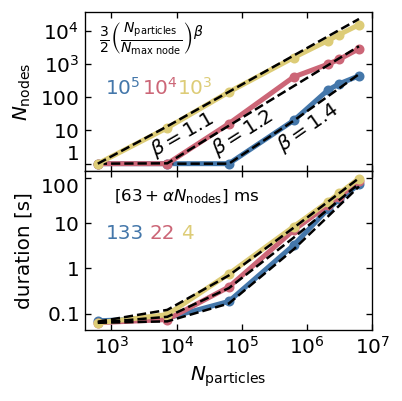

In [403]:
fig,axs = plt.subplots(nrows=2,ncols=1,sharex=True)
axs = np.array(axs).flatten()
fig.set_size_inches(latex_columnwidth,latex_columnwidth)
fig.set_dpi(120)
fig.subplots_adjust(hspace=0,wspace=0)
colors = get_distinct(len(maxes))
#axs[0].axhline(60,ls='--',c='gray',alpha=0.5)
#axs[0].text(1e3,50,'60 s',va='top',fontsize=10)
axs = axs[::-1]
xs = npointss

for j,this_max in enumerate(maxes[:]):
    ys = durations[:,j]
    axs[0].plot(xs,ys,lw=3,c=colors[j],marker='.',markeredgewidth=3)

alphas = [150*3/2,30*3/2,5*3/2]
axs[0].plot(xs,1/alphas[0]*3/2*(xs/1e3)**1.1+ys[0],ls='--',c='k')
axs[0].plot(xs,1/alphas[1]*3/2*(xs/1e4)**1.2+ys[0],ls='--',c='k')
axs[0].plot(xs,1/alphas[2]*3/2*(xs/1e5)**1.4+ys[0],ls='--',c='k')

text_xs = [8e2,3.7e3,1.1e4]
for j in [0,1,2]:
    axs[0].text(text_xs[j]*1.05,6,"%.0f"%(1000/alphas[2-j]),c=colors[j],
    va='center',ha='left')

axs[0].text(0.1,0.9,
#    xs[2]*1.5,((xs/3e5)**1.5+ys[0])[2],
r'$\left['+
f'{ys[0]*1e3:0.0f} +'
#r'\alpha^{-1}\left(\frac{N_\mathrm{particles}}{N_\mathrm{max~node}}\right)^\beta\right]$ s',
r'\alpha N_\mathrm{nodes} \right]$ ms',
va='top',ha='left',fontsize=10,transform=axs[0].transAxes)

nameAxes(axs[0],None,'$N_\mathrm{particles}$','duration [s]',logflag=(1,1)) 
axs[0].set_yticks([0.1,1,10,100])


text_xs = [8e2,3e3,1e4]
for j,this_max in enumerate(maxes[:]):
#    if j < 2: continue
    print(this_max)
    xs = npointss#nnodess[:,j]
    ys = nnodess[:,j]
    axs[1].plot(xs,ys,lw=3,c=colors[j],marker='.',markeredgewidth=3)
    a,b = fitAXb(np.log10(xs[2-j:]/this_max),np.log10(ys[2-j:]),None,fixed_b=np.log10(1.5))
    a = np.round(a,1)
    b=np.round(b,2)
    print(a,np.round(10**b,1))
    fn_ys = 10**(np.log10(xs[:]/this_max)*a+b)
    fn_ys[fn_ys<1] = 1
    axs[1].plot(xs[:],fn_ys,ls='--',c='k')


#axs[1].text(xs[2-j],nnodess[:,j][2-j]/1.25,'$10^{%d}$'%(5-j),c=colors[j],
for j in [0,1,2]:
    axs[1].text(text_xs[j],2e2,'$10^{%d}$'%(5-j),c=colors[j],
    va='center',ha='left')
    
#j = 1
#axs[1].text(xs[2-j],nnodess[:,j][2-j]*1.5,'$10^{%d}$'%(5-j),c=colors[j],
#j = 2
#axs[1].text(xs[2-j],nnodess[:,j][2-j]*1.5,'$10^{%d}$'%(5-j),c=colors[j],
    
axs[1].text(3.5e3,1.75,r'$\beta=%.1f$'%1.1,rotation=30)
axs[1].text(3e4,1.9,r'$\beta=%.1f$'%1.2,rotation=32.5)
axs[1].text(3e5,2.5,r'$\beta=%.1f$'%1.4,rotation=35)
    
nameAxes(
    axs[1],None,'$N_\mathrm{particles}$','$N_\mathrm{nodes}$',
         logflag=(1,1),
supertitle=r'$\frac{3}{2}\left(\frac{N_\mathrm{particles}}{N_\mathrm{max~node}}\right)^\beta$')
axs[1].set_yticks([1,10,100,1e3,1e4])

for ax in axs:
    ax.set_xticks(10**np.array([3,4,5,6,7]))
    ax.set_xticklabels(["$10^{%d}$"%power for power in [3,4,5,6,7]])
    ax.tick_params(top=True,labeltop=False)
    ax.tick_params(right=True,labelright=False,direction='in')
bufferAxesLabels(axs[::-1],2,1)
clean_savefig(fig,'Desktop/octree.pdf',latex_columnwidth,latex_columnwidth,plotdir=os.environ['HOME'])

In [ ]:
1e-2/3 @ dist 1.5 -> ~6 x ~6 px
1e-2 @ dist 1.5 -> ~15 x ~15 px
1e-2*2 @ dist 1.5 -> ~30 x ~30 px
1e-2*10 @ dist 1.5 -> ~160 x ~160 px

In [ ]:
cube 
size = 1 @ dist 2 -> ~750 x 750 px

In [150]:
cube_data = np.array([
[1000000,0.0025,58.823668008358695],
[1000000,0.005,45.18330290225457],
[1000000,0.01,23.275776385101487],
[1000000,0.015,16.303875816796523]])

small_cube_data = np.array([[100000,0.01,59.2321352674729],
[100000,0.02,58.823668008358695],
[100000,0.03,40.65763461631885],
[100000,0.04,29.501901181730204],
[100000,0.05,20.716417328085697],
[100000,0.06,18.25377295482392]])

In [272]:
dist = 2
ncoords = 10**5
size = 1

thetas = np.arange(0,360,1)
xs = np.sin(thetas/180*np.pi)*dist
zs = np.cos(thetas/180*np.pi)*dist
coords = np.zeros((thetas.size,3))
coords[:,1] = xs
coords[:,-1] = zs

my_tween = TweenParams(coords,duration=10)

coords = np.random.random( (ncoords, 3 ))-[0.5,0.5,0.5]

fields = np.ones(coords.shape[0])
my_arrayReader = ArrayReader(
    coords,
    fields=fields,
    write_to_disk=False,
    write_startup=True,
    tweenParams=my_tween)




my_arrayReader.particleGroups[0].field_radius_flags[0] = True
my_arrayReader.settings['radiusVariable']['PGroup_0']=0
my_arrayReader.settings['sizeMult']['PGroup_0'] = 1e-2*size
my_arrayReader.settings['camera'] = [0,0,-dist]
my_arrayReader.settings['start_tween'] = False

my_arrayReader.settings['UIfullscreen'] = True
my_arrayReader.settings['UIsnapshot'] = True
my_arrayReader.settings['UIreset'] = True
my_arrayReader.settings['UIsavePreset'] = True
my_arrayReader.settings['UIloadNewData'] = True
my_arrayReader.settings['UIcameraControls'] = True
my_arrayReader.settings['UIdecimation'] = False

my_arrayReader.settings['UIparticle'] = True
my_arrayReader.settings['UIdropdown'] = False
my_arrayReader.settings['UIcolorPicker'] = False


print(my_arrayReader.settings.keys())
print()
my_arrayReader.writeToDisk()

JSONdir is None, defaulting to /Users/agurvich/research/repos/Firefly/src/firefly/static/data/Data
Make sure each field_array (1) has a field_filter_flag (0), assuming True.
Make sure each field_array (1) has a field_colormap_flag (0), assuming True.
Make sure each field_array (1) has a field_radius_flag (0), assuming False.
Outputting: PGroup_0 - 100000/100000 particles - 1 tracked fields
['maxVrange', 'startFly', 'friction', 'stereo', 'stereoSep', 'decimate', 'start_tween', 'CDmin', 'CDmax', 'CDlognorm', 'columnDensity', 'UI', 'UIfullscreen', 'UIsnapshot', 'UIreset', 'UIsavePreset', 'UIloadNewData', 'UIcameraControls', 'UIdecimation', 'title', 'loaded', 'annotation', 'showFPS', 'showMemoryUsage', 'memoryLimit', 'center', 'camera', 'cameraRotation', 'cameraUp', 'quaternion', 'plotNmax', 'color', 'sizeMult', 'showParts', 'radiusVariable', 'UIparticle', 'UIdropdown', 'UIcolorPicker', 'showVel', 'velType', 'velVectorWidth', 'velGradient', 'animateVel', 'animateVelDt', 'animateVelTmax', '

''

In [112]:
npoints_data = np.array([[20000,0.01,51.63693683197952],
[30000,0.01,46.85996317062151],
[40000,0.01,41.25813430128025],
[50000,0.01,43.84534486191432],
[60000,0.01,33.55229565102766],
[70000,0.01,31.545016183780675],
[80000,0.01,28.542198693015266],
[90000,0.01,19.967852363246912],
[100000,0.01,19.382039114735694],
[110000,0.01,17.776018509635627],
[120000,0.01,9.923094917848347],
[130000,0.01,11.082622521517155]])

In [291]:
size_data = np.array([
#[10000,0.35,17.674732466002176],
#[10000,0.3,15.833684908048063],
#[10000,0.28,15.442628084893244],
[10000,0.26,11.780185533585332],
[10000,0.24,12.4879345673694],
[10000,0.22,20.968625868665157],
[10000,0.2,17.01570732377877],
[10000,0.19,19.15429909866694],
[10000,0.18,17.043439356790536],
[10000,0.17,20.156482190250937],
[10000,0.16,23.2634287143003],
[10000,0.15,22.627741086978375],
[10000,0.14,30.7268199880975],
[10000,0.13,29.514705573071538],
[10000,0.12,29.55733402820868],
[10000,0.11,37.41874658663799],
[10000,0.1,35.96349773304855],
[10000,0.09,38.24611123374909],
[10000,0.08,40.416397412107244],
[10000,0.07,41.681249778670704],
[10000,0.06,50.971914554975925],
[10000,0.05,58.823668008358695],
[10000,0.04,58.823668008358695],
[10000,0.03,58.823668008358695],
[10000,0.02,58.823668008358695],
[10000,0.01,59.23204360412846]])

saving: /Users/agurvich Desktop/fps_plots.pdf


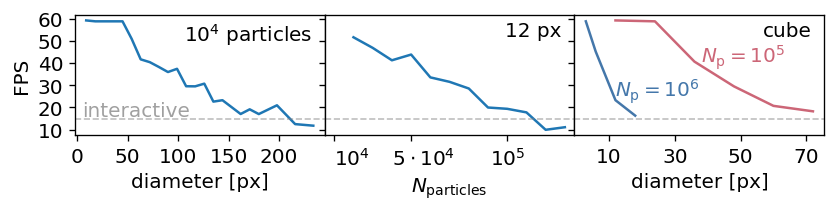

In [303]:
fig,axs = plt.subplots(nrows=1,ncols=3,sharey=True)
colors = get_distinct(2)
fig.subplots_adjust(wspace=0)
ax = axs[0]
ax.plot(size_data[:,1]*48/.04*1.5/2,size_data[:,2])
ax.axhline(15,ls='--',c='gray',alpha=0.5,lw=1)
ax.text(5,16,'interactive',c='gray',alpha=0.75)
ax.set_yticks(np.arange(0,70,10))
ax.set_xticks(np.arange(0,250,50))
nameAxes(ax,None,'diameter [px]','FPS',logflag=(0,0),supertitle='$10^4$ particles',swap_annotate_side=True)

ax = axs[1]
ax.plot(npoints_data[:,0]/1e4,npoints_data[:,2])
ax.axhline(15,ls='--',c='gray',alpha=0.5,lw=1)
ax.set_xticks([1,5,10])
ax.set_xticklabels(["$10^{4}$",r"    $5\cdot10^{4}$","$10^5$"])
ax.get_xticklabels()[0].set_horizontalalignment('left')

ax.set_xlim(0.5,13.5)
nameAxes(ax,None,r'$N_\mathrm{particles}$',None,logflag=(0,0),supertitle='12 px',swap_annotate_side=True)

ax = axs[2]
ax.plot(cube_data[:,1]*48/.04,cube_data[:,2],c=colors[0])
ax.plot(small_cube_data[:,1]*48/.04,small_cube_data[:,2],c=colors[1])
ax.text(12,25,'$N_\mathrm{p} = 10^6$',c=colors[0])
ax.text(38,40,'$N_\mathrm{p} = 10^5$',c=colors[1])
ax.axhline(15,ls='--',c='gray',alpha=0.5,lw=1)
ax.set_xticks(np.arange(10,80,20))
nameAxes(ax,None,'diameter [px]',None,logflag=(0,0),supertitle='cube',swap_annotate_side=True)
#bufferAxesLabels(axs,1,3)

fig.set_dpi(120)
clean_savefig(fig,'Desktop/fps_plots.pdf',latex_pagewidth,latex_pagewidth/4,plotdir=os.environ['HOME'])